In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
project_dir = Path("__file__").resolve().parents[2]
project_dir

PosixPath('/Users/b1017579/Documents/PhD/Projects/14-temporal-granularity/temporal_granularity')

In [5]:
pv = pd.read_csv('{}/data/processed/resources/pv_processed.csv'.format(project_dir))
pv.datetime=pd.to_datetime(pv.datetime)
pv.head()

,Unnamed: 0,datetime,capacity_factor
0,0,1980-01-01 00:00:00,0.0
1,1,1980-01-01 01:00:00,0.0
2,2,1980-01-01 02:00:00,0.0
3,3,1980-01-01 03:00:00,0.0
4,4,1980-01-01 04:00:00,0.0


In [6]:
wind = pd.read_csv('{}/data/processed/resources/wind_processed.csv'.format(project_dir))
wind = wind.rename(columns={"time":"datetime"})
wind.datetime=pd.to_datetime(wind.datetime)
wind.head()

,Unnamed: 0,datetime,offshore,onshore
0,0,1980-01-01 00:00:00,0.2858,0.1496
1,1,1980-01-01 01:00:00,0.2827,0.1502
2,2,1980-01-01 02:00:00,0.2852,0.1485
3,3,1980-01-01 03:00:00,0.2920,0.1470
4,4,1980-01-01 04:00:00,0.3039,0.1489


In [7]:
demand = pd.read_csv('{}/data/processed/demand/electricity_demand.csv'.format(project_dir))
demand['datetime']=pd.to_datetime(demand[' timestamp'])
demand = demand.drop(['id', ' timestamp'], axis=1)
demand = demand.set_index('datetime').resample('h').mean()
demand = demand.reset_index()
demand.head()

,datetime,demand
0,2011-05-27 15:00:00,38859.500000
1,2011-05-27 16:00:00,38657.083333
2,2011-05-27 17:00:00,37497.583333
3,2011-05-27 18:00:00,36146.333333
4,2011-05-27 19:00:00,34741.166667


## Wind Dynamic Aspects

In [15]:
wind_2016 = wind[(wind.datetime>"2016") & (wind.datetime<"2017")]


In [25]:
wind_diff_2016=wind_2016.copy()
wind_2016['diff'] = wind_diff_2016.diff()['onshore']
wind_2016.head()

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,datetime,offshore,onshore,diff
315553,315553,2016-01-01 01:00:00,0.4152,0.4315,NaN
315554,315554,2016-01-01 02:00:00,0.3134,0.4005,-0.0310
315555,315555,2016-01-01 03:00:00,0.2164,0.3690,-0.0315
315556,315556,2016-01-01 04:00:00,0.1547,0.3394,-0.0296
315557,315557,2016-01-01 05:00:00,0.1493,0.3225,-0.0169


In [34]:
wind_2016_sorted = wind_2016.sort_values('diff', ascending=False).reset_index().reset_index()
wind_2016_sorted.head()

,level_0,index,Unnamed: 0,datetime,offshore,onshore,diff
0,0,318536,318536,2016-05-04 08:00:00,0.2852,0.4924,0.1157
1,1,316296,316296,2016-02-01 00:00:00,0.8822,0.6509,0.1088
2,2,316738,316738,2016-02-19 10:00:00,0.4687,0.5116,0.1024
3,3,321993,321993,2016-09-25 09:00:00,0.5785,0.4500,0.1014
4,4,318944,318944,2016-05-21 08:00:00,0.7126,0.4767,0.0977


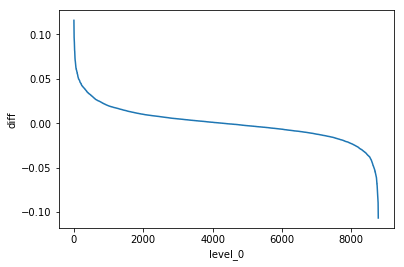

In [35]:
sns.lineplot(data=wind_2016_sorted, x='level_0', y='diff')

In [42]:
wind['year'] = wind.datetime.dt.year

wind_diff=wind.copy()
wind_diff['diff'] = wind_diff.diff()['onshore']
wind_diff.head()

,Unnamed: 0,datetime,offshore,onshore,year,diff
0,0,1980-01-01 00:00:00,0.2858,0.1496,1980,NaN
1,1,1980-01-01 01:00:00,0.2827,0.1502,1980,0.0006
2,2,1980-01-01 02:00:00,0.2852,0.1485,1980,-0.0017
3,3,1980-01-01 03:00:00,0.2920,0.1470,1980,-0.0015
4,4,1980-01-01 04:00:00,0.3039,0.1489,1980,0.0019


In [45]:
wind_each_year = wind_diff.groupby('year').apply(lambda x: x.sort_values('diff', ascending=False).reset_index().reset_index())
wind_each_year.head()

level_0  index  Unnamed: 0            datetime  offshore  onshore  \
year                                                                        
1980 0        0   6082        6082 1980-09-10 10:00:00    0.7680   0.5221   
     1        1   1978        1978 1980-03-23 10:00:00    0.5642   0.4387   
     2        2   8366        8366 1980-12-14 14:00:00    0.9771   0.5869   
     3        3   8367        8367 1980-12-14 15:00:00    0.9713   0.6921   
     4        4   1977        1977 1980-03-23 09:00:00    0.5444   0.3232   

        year    diff  
year                  
1980 0  1980  0.1597  
     1  1980  0.1155  
     2  1980  0.1073  
     3  1980  0.1052  
     4  1980  0.1017

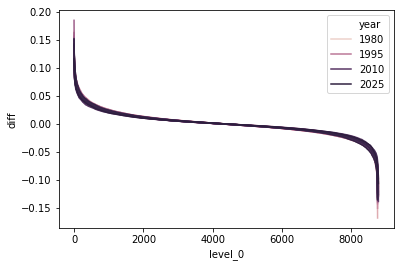

In [46]:
sns.lineplot(data=wind_each_year, x='level_0', y='diff', hue='year')